## NBA PREDICT PTS Local Team Game - Estadísticas 4 Factors + Tradicionales.
- Primero hay que lanzar el proceso que importa a partir de la api "nba_api", los datos de cada partido de la NBA en la temporada regular en curso o última que se jugo, en caso de que no se parametrice el valor de "season=" de los metodos utilizados.  **C:\Users\RubenGA\WorkSpaces_rga01\Python\Scripts\NBA_g4factors_ETLscript_00.py** ***Se Ha modificado el script para obtener tb los puntos finales del equipo local y visitante para cada game. EL SCRIPT DEFINITIVAMENTE SE QUEDARÁ ASI, PARA FUTURAS EXTRACCIONES DE DATOS DE LA API (XA CADA GAME DISPUTADO..), YA QUE TRAER MÁS INFORMACIÓN QUE AUMENTE EL CONOCIMIENTO Y EL CONTEXTO DEL CONJUNTO DE DATOS, SIEMPRE ES BUENA PRÁCTICA**.
- Los datos se transforman para tener una sola fila por cada game con información general del partido y los datos continuos(numéricos), que son algunas estadiscticas generales del partido + los 4 factores diferenciando local y visitante (var.predictoras continuas..), y se incluye tb la var.objetivo a predecir, que xa este caso, es si el equipo local gana o no (W/L) o más bien que puntos obtendrá el equipo local para cada Game,(En el conjunto de datos tb esta el W/L y los puntos totales del equipo visitante, x si en algunos casos o xa algunos algoritmos fuese mejor esa var.Objetivo..)
- Se realizará un EDA de los Datos, y si fuese necesario se cambiará el tipo o clase de algún atributo que no haya reconocido pandas, y asi observar y analizar los datos con detenimiento.
- En función de las necesidades se aplicarán técnicas de Ingenieria de carácteristicas y redución de dimensionalidad (PCA,UMAP..), para observar como se comportan las variables predictoras en función de la var.objetivo o no, y observar las métricas de tendencia central las cuales se utilizan para aplicar determinadas teorías estadísticas
- Se aplicarán algoritmos de Regression Supervisada con diferentes técnicas para poder comparar y evaluar los modelos de ML.

In [1]:
# Importando librerias
import pandas as pd
import numpy as np
import time
import os
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

# Modelos de Clasificación Supervisada(Algunos)
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Modelos de Regresión Lineal Supervisada..
# https://towardsdatascience.com/five-regression-python-modules-that-every-data-scientist-must-know-a4e03a886853
# https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-regression-models
# https://learnpython.com/blog/regression-analysis-in-python/
# https://openclassrooms.com/en/courses/6389626-train-a-supervised-machine-learning-model/6405946-build-and-evaluate-a-regression-model
import scipy as sp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, BayesianRidge, ridge_regression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
#from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
#from xgboost.sklearn import XGBRegressor
#from lightgbm import LGBMRegressor


# Técnicas y métodos de evaluación de modelos de ML
# https://www.codespeedy.com/model-evaluation-metrics-in-regression-models-with-python/
#from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [2]:
# Permanently changes the pandas settings
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

os.getcwd()

'C:\\Users\\RubenGA\\WorkSpaces_rga01\\Python\\Notebooks\\Practicas_NBA'

### DATOS - Proceso mediante script python "NBA_Practica_00.py" con NBA_API utilizando varios metodos.
- endpoints.leaguegamelog.LeagueGameLog().get_data_frames()[0] IDs y stats Tradicionales de los GAMES (Temporada Regular última o actual..al no definir el valor de los parámetros de entrada del método, tipo "season=").
- endpoints.boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id=ind_idgame), Bucle for para obtener las estadisticas de 4factors de cada partido de la temporada regular.
- Se realizan tranformaciones a los datos recuperados para UNIR, quitar y renombrar columnas..etc, y dejar el conjunto de datos lo más entendible posible dentro del contexto de a que hacen referencia los datos, en este caso reflejan un tipo de estadísticas generales por cada equipo se enfrenta, diferenciando en la misma fila las stats del team local(_l) y el visitante(_v), y si gana o pierde el equipo local (WL_l) y el visitante (WL_v)
    - Transformaciones importantes: Los 2 métodos de la api utilizados te devuelven 2 filas por cada Game una xa el equipo local y otra xa el quipo visitante, x lo que hay que utilizar técnicas para convertir en una sola fila sin perder información importante.
- Tras tener los datos listos para explotar, se exportan a un fichero csv, para no sobrecargar la api..
df_games4factors_1lineXgames.to_csv('C:/Users/RubenGA/WorkSpaces_rga01/Python/Data/df_games_4factors_clean1linesXgames_2021-22.csv')

In [3]:
# C:/Users/RubenGA/WorkSpaces_rga01/Python/Data/df_games_4factors_clean1linesXgames_2021-22.csv
# path = "/Python/Data/"
path = "C:/Users/RubenGA/WorkSpaces_rga01/Python/Data/"
file = "df_games_4factors_clean1linesXgames_2021-22.csv"
df_00 = pd.read_csv(path+file, index_col=0)
df_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GAME_ID              1230 non-null   int64  
 1   SEASON_ID            1230 non-null   int64  
 2   TEAM_ID_l            1230 non-null   int64  
 3   TEAM_ID_v            1230 non-null   int64  
 4   TEAM_ABBREVIATION_l  1230 non-null   object 
 5   TEAM_NAME_l          1230 non-null   object 
 6   TEAM_ABBREVIATION_v  1230 non-null   object 
 7   TEAM_NAME_v          1230 non-null   object 
 8   GAME_DATE            1230 non-null   object 
 9   MATCHUP              1230 non-null   object 
 10  WL_l                 1230 non-null   object 
 11  WL_v                 1230 non-null   object 
 12  PTS_l                1230 non-null   int64  
 13  PTS_v                1230 non-null   int64  
 14  EFG_PCT_l            1230 non-null   float64
 15  FTA_RATE_l           1230 non-null   f

In [4]:
df_00.head()

GAME_ID  SEASON_ID   TEAM_ID_l   TEAM_ID_v TEAM_ABBREVIATION_l  \
0  22100001      22021  1610612749  1610612751                 MIL   
1  22100002      22021  1610612747  1610612744                 LAL   
2  22100003      22021  1610612766  1610612754                 CHA   
3  22100004      22021  1610612765  1610612741                 DET   
4  22100005      22021  1610612752  1610612738                 NYK   

          TEAM_NAME_l TEAM_ABBREVIATION_v            TEAM_NAME_v   GAME_DATE  \
0     Milwaukee Bucks                 BKN          Brooklyn Nets  2021-10-19   
1  Los Angeles Lakers                 GSW  Golden State Warriors  2021-10-19   
2   Charlotte Hornets                 IND         Indiana Pacers  2021-10-20   
3     Detroit Pistons                 CHI          Chicago Bulls  2021-10-20   
4     New York Knicks                 BOS         Boston Celtics  2021-10-20   

       MATCHUP WL_l WL_v  PTS_l  PTS_v  EFG_PCT_l  FTA_RATE_l  TM_TOV_PCT_l  \
0  MIL vs. BKN    W    L    127    104      0.538       0.171         0.074   
1  LAL vs. GSW    L    W    114    121      0.553       0.200         0.155   
2  CHA vs. IND    W    L    123    122      0.491       0.252         0.070   
3  DET vs. CHI    L    W     88     94      0.433       0.144         0.167   
4  NYK vs. BOS    W    L    138    134      0.567       0.257         0.147   

   OREB_PCT_l  OPP_EFG_PCT_l  OPP_FTA_RATE_l  OPP_TOV_PCT_l  OPP_OREB_PCT_l  \
0       0.224          0.542           0.274          0.127           0.176   
1       0.094          0.516           0.323          0.149           0.241   
2       0.182          0.561           0.267          0.155           0.255   
3       0.193          0.471           0.174          0.169           0.260   
4       0.123          0.500           0.197          0.138           0.296   

   FG_PCT_l  FG3_PCT_l  FT_PCT_l  OREB_l  DREB_l  AST_l  STL_l  BLK_l  TOV_l  \
0     0.457      0.378     0.778      13      41     25      8      9      8   
1     0.474      0.357     0.474       5      40     21      7      4     18   
2     0.430      0.419     0.667      12      34     29      9      5      8   
3     0.400      0.214     0.769      11      36     17      7      5     17   
4     0.486      0.378     0.704       7      48     27      9     10     19   

   PF_l  EFG_PCT_v  FTA_RATE_v  TM_TOV_PCT_v  OREB_PCT_v  OPP_EFG_PCT_v  \
0    19      0.542       0.274         0.127       0.098          0.538   
1    25      0.516       0.323         0.149       0.167          0.553   
2    21      0.561       0.267         0.155       0.157          0.491   
3    16      0.471       0.174         0.169       0.180          0.433   
4    22      0.500       0.197         0.138       0.211          0.567   

   OPP_FTA_RATE_v  OPP_TOV_PCT_v  OPP_OREB_PCT_v  FG_PCT_v  FG3_PCT_v  \
0           0.171          0.074           0.293     0.440      0.531   
1           0.200          0.155           0.189     0.441      0.359   
2           0.252          0.070           0.333     0.467      0.362   
3           0.144          0.167           0.263     0.430      0.304   
4           0.257          0.147           0.281     0.410      0.368   

   FT_PCT_v  OREB_v  DREB_v  AST_v  STL_v  BLK_v  TOV_v  PF_v  
0     0.565       5      39     19      3      9     13    17  
1     0.833       9      41     30      9      2     17    18  
2     0.875       8      43     29      2     10     17    24  
3     0.867       9      39     18      8      5     17    19  
4     0.739      15      41     34     13      9     18    24

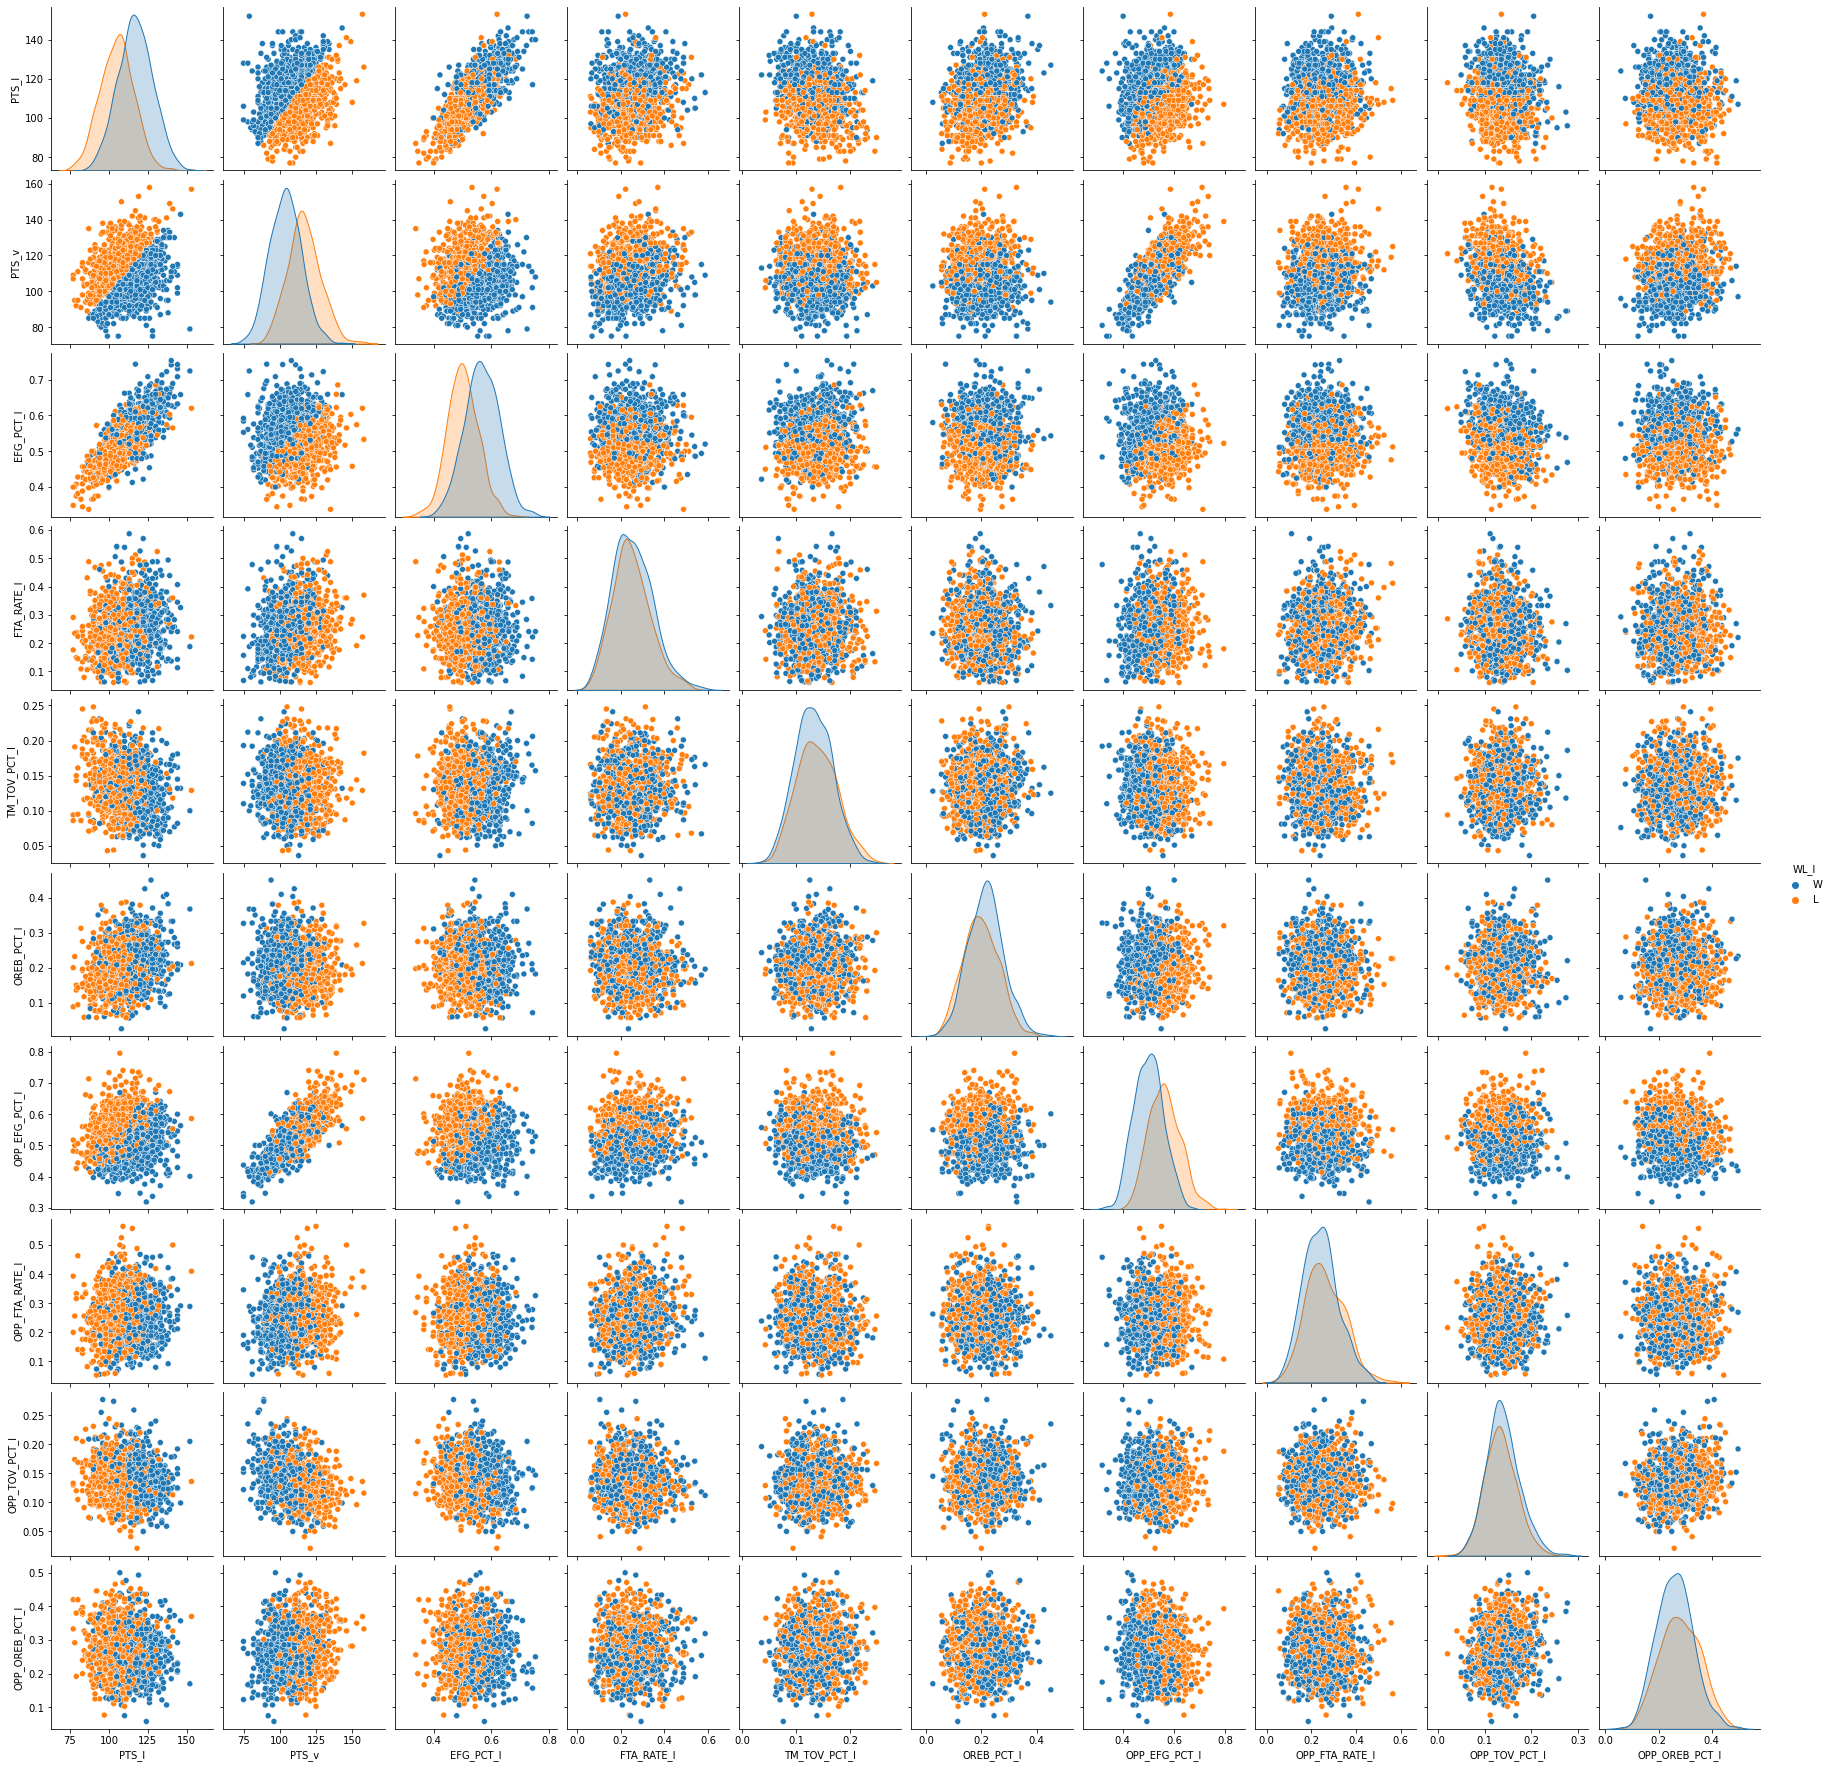

In [5]:
sb.pairplot(df_00.iloc[:,10:22], hue='WL_l')

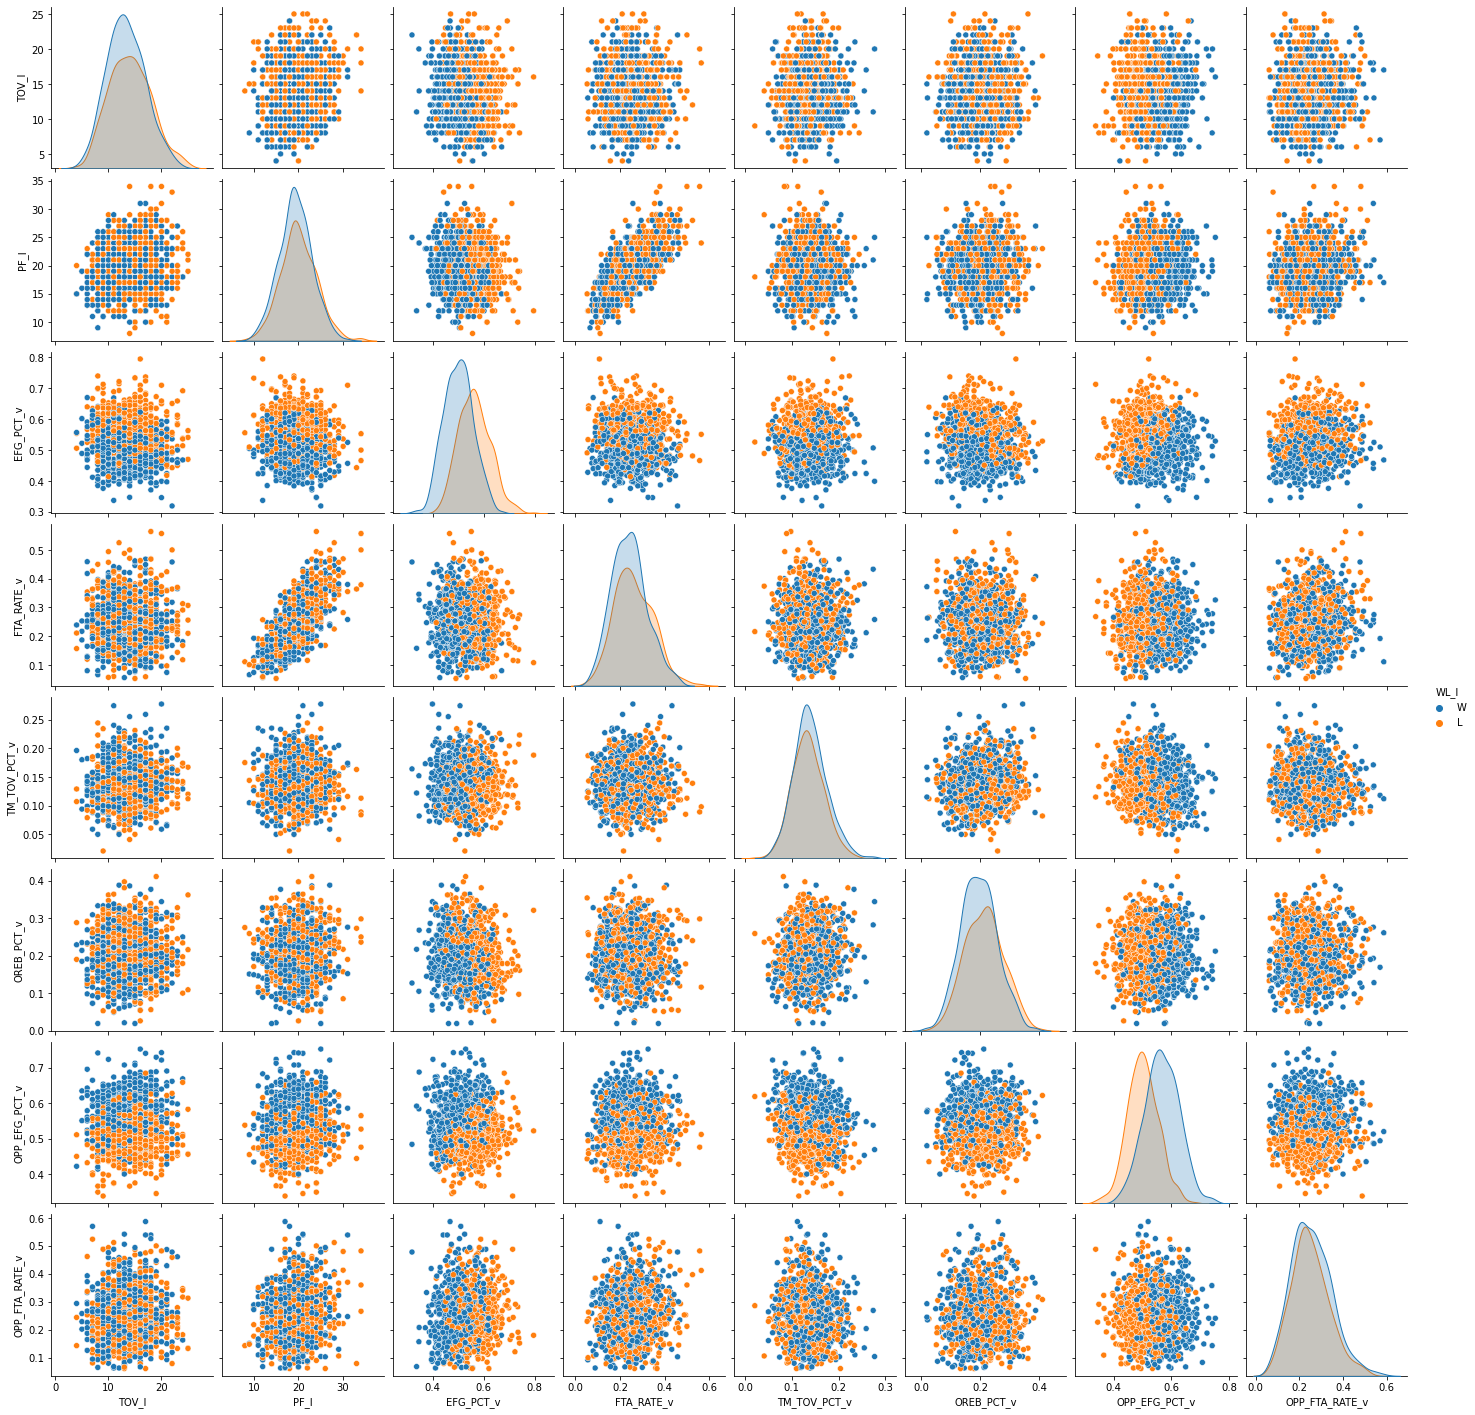

In [6]:
sb.pairplot(df_00.iloc[:,[10,30,31,32,33,34,35,36,37]], hue='WL_l')

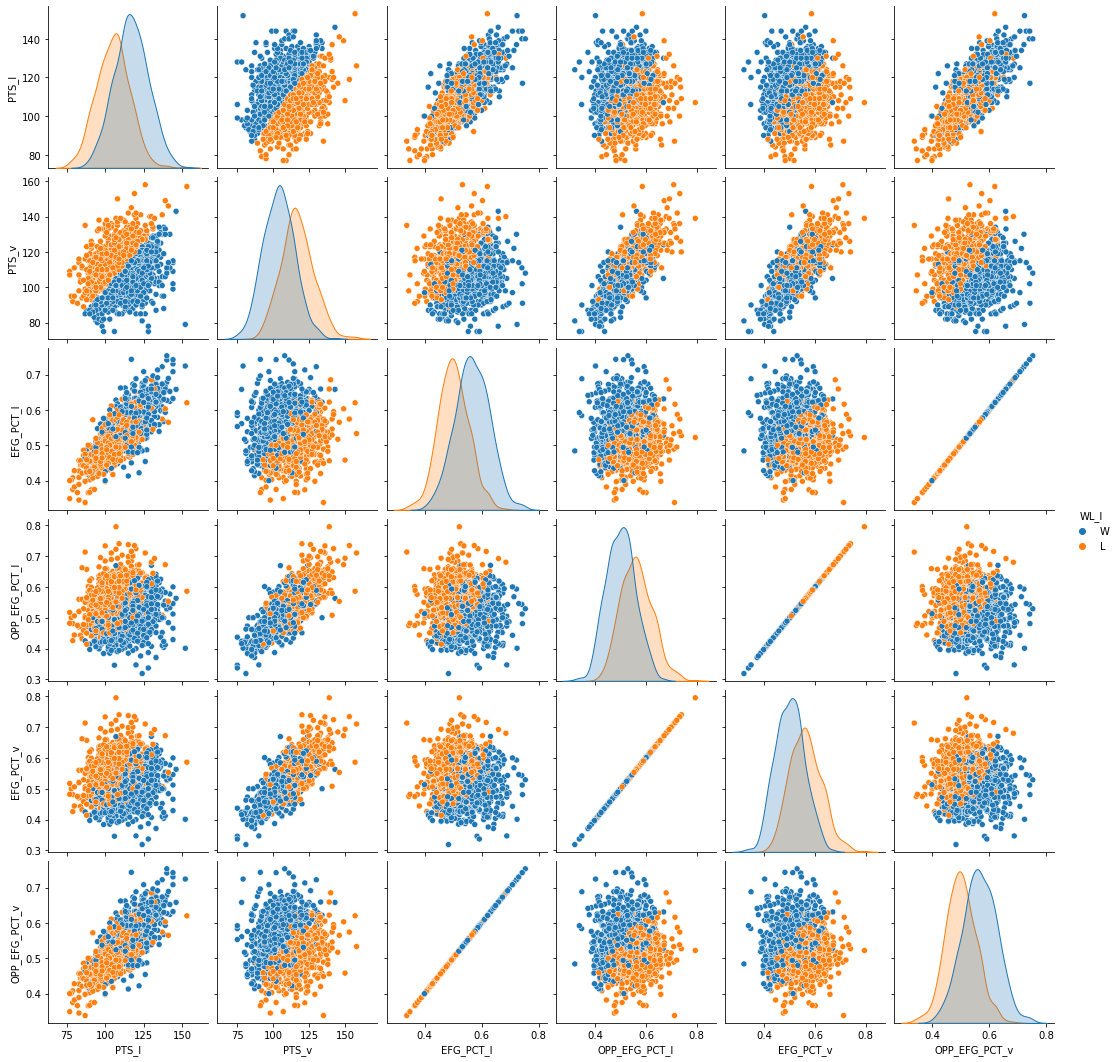

In [7]:
sb.pairplot(df_00.iloc[:,[10,12,13,14,18,32,36]], hue='WL_l')

## MACHINE LEARNING - Regression Supervisada.
### DEFINIENDO LOS DATOS DE TRAIN Y TEST.

In [8]:
df_00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 0 to 1229
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GAME_ID              1230 non-null   int64  
 1   SEASON_ID            1230 non-null   int64  
 2   TEAM_ID_l            1230 non-null   int64  
 3   TEAM_ID_v            1230 non-null   int64  
 4   TEAM_ABBREVIATION_l  1230 non-null   object 
 5   TEAM_NAME_l          1230 non-null   object 
 6   TEAM_ABBREVIATION_v  1230 non-null   object 
 7   TEAM_NAME_v          1230 non-null   object 
 8   GAME_DATE            1230 non-null   object 
 9   MATCHUP              1230 non-null   object 
 10  WL_l                 1230 non-null   object 
 11  WL_v                 1230 non-null   object 
 12  PTS_l                1230 non-null   int64  
 13  PTS_v                1230 non-null   int64  
 14  EFG_PCT_l            1230 non-null   float64
 15  FTA_RATE_l           1230 non-null   f

In [9]:
# Definiendo las var.predictoras(Solo estadisticas 4factors) y la var.Objetivo

X = df_00.iloc[:,[14,15,16,17,18,19,20,21,32,33,34,35,36,37,38,39]]
y = df_00.PTS_l

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,'-',y_train.shape)
print(X_test.shape,'-',y_test.shape)

(984, 16) - (984,)
(246, 16) - (246,)


### REGRESSION LINEAL.
### - Es buena práctica en casi todos los modelos de regresión, no prescindir del intercept, ya que lo que forzamos es que la función de regresión tenga una predicción de "0" cuando las variables predictoras son 0 o menor, y para el caso de estudio esto no es correcto ( como para casi ningún caso de regresión con multiples predictores..)..un predictor como x ejemplo las perdidas o los robos peden ser "0", y la var.objetivo no es "0"
- Por lo que es recomendable no quitarla "fit_intercept=True)..ols.add_constant()..etc

In [10]:
mod_lr = LinearRegression(fit_intercept=False).fit(X_train,y_train)

y_predict_01 = pd.Series(mod_lr.predict(X_test), index=X_test.index)
#y_predict_001 = mod_lr.predict(X_train)


In [11]:

# METRICAS E INDICADORES DE LR..
# Modelo "mod_lr":
print("---ST con Modelo de Regre Lineal de orden/grado polinomico 2 '(Cuadrática) y técnicas de Fourier'----")
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
# Estos coeficientes son los que configuran los parámetros de la función y=aX+b...
print('Coefficients: \n', list(zip(X.columns, mod_lr.coef_.flatten()))[:10])
# Este es el valor donde corta el eje Y (en X=0) si Fit_intercept = False => "0", y no es correcto..xa definr la func.regress
print('Independent term: \n', mod_lr.intercept_)
# Coeficiente de determinación..
print(f"Coeficiente de Determinación R^2 - Train:{mod_lr.score(X_train,y_train)}")
print(f"Coeficiente de Determinación R^2 - Test:{mod_lr.score(X_test,y_test)}")
# Error Cuadratico Medio
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_predict_01))
# Raiz del Error Cuadratico Medio
print("Raiz Mean squared error (RMSE): %.2f" % mean_squared_error(y_test, y_predict_01, squared=False))
print("RAiz Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, y_predict_01)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Coeficiente de Determinación(CoVariance score): %.2f' % r2_score(y_test, y_predict_01))


---ST con Modelo de Regre Lineal de orden/grado polinomico 2 '(Cuadrática) y técnicas de Fourier'----
Coefficients: 
 [('EFG_PCT_l', 82.90989742586687), ('FTA_RATE_l', 12.230966598640594), ('TM_TOV_PCT_l', -44.1898850837978), ('OREB_PCT_l', 30.0820758819235), ('OPP_EFG_PCT_l', 7.6006040918247635), ('OPP_FTA_RATE_l', 7.722328181840492), ('OPP_TOV_PCT_l', 10.114609769931121), ('OPP_OREB_PCT_l', -3.704492992991403), ('EFG_PCT_v', 7.600604091824774), ('FTA_RATE_v', 7.722328181840495)]
Independent term: 
 0.0
Coeficiente de Determinación R^2:0.7773323890562953
Coeficiente de Determinación R^2:0.804842830096868
Mean squared error (MSE): 33.88
Raiz Mean squared error (RMSE): 5.82
RAiz Mean squared error (RMSE): 5.82
Coeficiente de Determinación(CoVariance score): 0.80


In [12]:
y_predict_01

548      96.579045
704     109.009045
244     142.260458
552     112.731338
1164    114.601107
           ...    
808     107.773440
88      105.442438
1144     99.491220
298     128.811062
376     135.827226
Length: 246, dtype: float64

In [13]:
df_00.iloc[X_test.index, [5,7,12,13]]

TEAM_NAME_l           TEAM_NAME_v  PTS_l  PTS_v
548        Charlotte Hornets          Phoenix Suns     99    133
704         Dallas Mavericks     Memphis Grizzlies    104     91
244   Minnesota Timberwolves     Memphis Grizzlies    138     95
552       Washington Wizards     Charlotte Hornets    124    121
1164   Golden State Warriors             Utah Jazz    111    107
...                      ...                   ...    ...    ...
808              LA Clippers       Milwaukee Bucks    113    137
88          Dallas Mavericks      Sacramento Kings    105     99
1144   Golden State Warriors          Phoenix Suns    103    107
298                Utah Jazz  New Orleans Pelicans    127    105
376         Sacramento Kings         Orlando Magic    142    130

[246 rows x 4 columns]

In [14]:
df_01 = df_00.iloc[X_test.index, [5,7,12,13]]

df_01.insert(3,"Predict_PTS_l", y_predict_01)
df_01.head()


TEAM_NAME_l        TEAM_NAME_v  PTS_l  Predict_PTS_l  PTS_v
548        Charlotte Hornets       Phoenix Suns     99      96.579045    133
704         Dallas Mavericks  Memphis Grizzlies    104     109.009045     91
244   Minnesota Timberwolves  Memphis Grizzlies    138     142.260458     95
552       Washington Wizards  Charlotte Hornets    124     112.731338    121
1164   Golden State Warriors          Utah Jazz    111     114.601107    107

In [87]:
# Con Intercept..+CORRECTO!
mod_lr = LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_predict_01 = pd.Series(mod_lr.predict(X_test), index=X_test.index)

# METRICAS E INDICADORES DE LR..
# Modelo "mod_lr":
print("---ST con Modelo de Regre Lineal de orden/grado polinomico 2 '(Cuadrática) y técnicas de Fourier'----")
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
# Estos coeficientes son los que configuran los parámetros de la función y=aX+b...
print('Coefficients: \n', list(zip(X.columns, mod_lr.coef_.flatten()))[:10])
# Este es el valor donde corta el eje Y (en X=0) si Fit_intercept = False => "0", y no es correcto..xa definr la func.regress
print('Independent term: \n', mod_lr.intercept_)
# Coeficiente de determinación..
print(f"Coeficiente de Determinación R^2 - Train:{mod_lr.score(X_train,y_train)}")
print(f"Coeficiente de Determinación R^2 - Test:{mod_lr.score(X_test,y_test)}")
# Error Cuadratico Medio
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_predict_01))
# Raiz del Error Cuadratico Medio
print("Raiz Mean squared error (RMSE): %.2f" % mean_squared_error(y_test, y_predict_01, squared=False))
print("RAiz Mean squared error (RMSE): %.2f" % np.sqrt(mean_squared_error(y_test, y_predict_01)))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Coeficiente de Determinación(CoVariance score): %.2f' % r2_score(y_test, y_predict_01))

---ST con Modelo de Regre Lineal de orden/grado polinomico 2 '(Cuadrática) y técnicas de Fourier'----
Coefficients: 
 [('EFG_PCT_l', 76.05414649046394), ('FTA_RATE_l', 11.180755136553278), ('TM_TOV_PCT_l', -49.15209840026205), ('OREB_PCT_l', 28.857820864601162), ('OPP_EFG_PCT_l', 1.5884410376776161), ('OPP_FTA_RATE_l', 6.007046692319186), ('OPP_TOV_PCT_l', 4.173916134243712), ('OPP_OREB_PCT_l', -10.836246241264508), ('EFG_PCT_v', 1.5884410376776237), ('FTA_RATE_v', 6.007046692319193)]
Independent term: 
 20.977095156251465
Coeficiente de Determinación R^2 - Train:0.7911697818624444
Coeficiente de Determinación R^2 - Test:0.8057585592933824
Mean squared error (MSE): 33.72
Raiz Mean squared error (RMSE): 5.81
RAiz Mean squared error (RMSE): 5.81
Coeficiente de Determinación(CoVariance score): 0.81


In [88]:
y_predict_01

548      95.899761
704     109.061217
244     140.146250
552     113.447237
1164    114.451959
           ...    
808     108.349154
88      107.266032
1144     99.968541
298     127.076046
376     133.967231
Length: 246, dtype: float64

In [ ]:
# SE OBSERVA QUE LOS VALORES QUE PEOR AJUSTA EL MODELO, SON LOS QUE EN EL EL VALOR REAL, DENTRO DE LA DISTRIBUCIÓN O FUNCIÓN
# DE DENSIDAD DE PROBABILIDAD, SE CONSIDERÁN OUTLAYER O VALORES LEJOS DE LA MEDIA DE SU DISTRIBUCIÓN..

### OLS Model.

In [96]:
# SIN INTERCEPT...Mala Práctica...
mod_ols = sm.OLS(endog=y_train, exog=X_train).fit()
print(mod_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                  PTS_l   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.657e+04
Date:                Sat, 08 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:16:19   Log-Likelihood:                         -3123.4
No. Observations:                 984   AIC:                                      6267.
Df Residuals:                     974   BIC:                                      6316.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
## CUANDO UNA VARIABLE PREDICTORA EN SU p>|t| ES SUPERIOR A "0,05" SE DICE QUE NO ES SIGNIFICATIVA XA EL MODELO Y SE PODRÍA
# PRESCINDIR DE ELLA..
# https://medium.com/analytics-vidhya/application-and-interpretation-with-ols-statsmodels-499c69ef6834

In [86]:
print(mod_ols.conf_int())

                        0          1
EFG_PCT_l       80.646621  85.173174
FTA_RATE_l      10.170331  14.291602
TM_TOV_PCT_l   -49.270804 -39.108967
OREB_PCT_l      18.632852  41.531300
OPP_EFG_PCT_l    5.301479   9.899729
OPP_FTA_RATE_l   5.539483   9.905173
OPP_TOV_PCT_l    5.044797  15.184423
OPP_OREB_PCT_l -13.624380   6.215394
EFG_PCT_v        5.301479   9.899729
FTA_RATE_v       5.539483   9.905173
TM_TOV_PCT_v     5.044797  15.184423
OREB_PCT_v     -12.623685   9.795490
OPP_EFG_PCT_v   80.646621  85.173174
OPP_FTA_RATE_v  10.170331  14.291602
OPP_TOV_PCT_v  -49.270804 -39.108967
OPP_OREB_PCT_v  20.784193  41.068355


In [97]:
# Coeficiente de determinación..
print(f"Coeficiente de Determinación R^2 - Train:{mod_ols.rsquared}")
print(f"Coeficiente de Determinación R^2 - Test:{mod_ols.rsquared_adj}")
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Coeficiente de Determinación(CoVariance score): %.2f' % r2_score(y_test, mod_ols.predict(X_test)))
print("RMSE: ", mean_squared_error(y_test, mod_ols.predict(X_test), squared=False))

Coeficiente de Determinación R^2 - Train:0.997343625455763
Coeficiente de Determinación R^2 - Test:0.9973163526164999
Coeficiente de Determinación(CoVariance score): 0.80
RMSE:  5.820810394152146


In [16]:
df_01.insert(3,"Predict2_PTS_l", mod_ols.predict(X_test))
df_01.head()

TEAM_NAME_l        TEAM_NAME_v  PTS_l  Predict2_PTS_l  \
548        Charlotte Hornets       Phoenix Suns     99       96.579045   
704         Dallas Mavericks  Memphis Grizzlies    104      109.009045   
244   Minnesota Timberwolves  Memphis Grizzlies    138      142.260458   
552       Washington Wizards  Charlotte Hornets    124      112.731338   
1164   Golden State Warriors          Utah Jazz    111      114.601107   

      Predict_PTS_l  PTS_v  
548       96.579045    133  
704      109.009045     91  
244      142.260458     95  
552      112.731338    121  
1164     114.601107    107

In [17]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 548 to 376
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TEAM_NAME_l     246 non-null    object 
 1   TEAM_NAME_v     246 non-null    object 
 2   PTS_l           246 non-null    int64  
 3   Predict2_PTS_l  246 non-null    float64
 4   Predict_PTS_l   246 non-null    float64
 5   PTS_v           246 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 13.5+ KB


In [102]:
# AÑADIENDO INTERCEPT...+CORRECTO!!
mod_ols = sm.OLS(endog=y_train, exog=X_train.assign(intercept=1)).fit()
print(mod_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PTS_l   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     368.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):          1.14e-322
Time:                        01:50:02   Log-Likelihood:                -3091.8
No. Observations:                 984   AIC:                             6206.
Df Residuals:                     973   BIC:                             6259.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EFG_PCT_l         76.0541      1.406     54.

In [103]:
X_train.columns

Index(['EFG_PCT_l', 'FTA_RATE_l', 'TM_TOV_PCT_l', 'OREB_PCT_l',
       'OPP_EFG_PCT_l', 'OPP_FTA_RATE_l', 'OPP_TOV_PCT_l', 'OPP_OREB_PCT_l',
       'EFG_PCT_v', 'FTA_RATE_v', 'TM_TOV_PCT_v', 'OREB_PCT_v',
       'OPP_EFG_PCT_v', 'OPP_FTA_RATE_v', 'OPP_TOV_PCT_v', 'OPP_OREB_PCT_v'],
      dtype='object')

In [104]:
print("RMSE: ", mean_squared_error(y_test, mod_ols.predict(X_test.assign(intercept=1)), squared=False))

RMSE:  5.8071379435835535


In [ ]:
# MEJOR (RAIZ)ERROR CUADRÁTICO MEDIO...UTILIZAR EN EL APLICATIVO WEB PARA PROYECTAR LA PUNTUACIÓN DEL EQUIPO LOCAL

In [93]:
X_test.columns

Index(['EFG_PCT_l', 'FTA_RATE_l', 'TM_TOV_PCT_l', 'OREB_PCT_l',
       'OPP_EFG_PCT_l', 'OPP_FTA_RATE_l', 'OPP_TOV_PCT_l', 'OPP_OREB_PCT_l',
       'EFG_PCT_v', 'FTA_RATE_v', 'TM_TOV_PCT_v', 'OREB_PCT_v',
       'OPP_EFG_PCT_v', 'OPP_FTA_RATE_v', 'OPP_TOV_PCT_v', 'OPP_OREB_PCT_v'],
      dtype='object')

In [108]:
# Entrenar el modelo ols con la variable objetivo PTS_l
y = df_00.PTS_v

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

mod_ols = sm.OLS(endog=y_train, exog=X_train.assign(intercept=1)).fit()
print(mod_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  PTS_v   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     398.1
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:54:05   Log-Likelihood:                -3097.1
No. Observations:                 984   AIC:                             6216.
Df Residuals:                     973   BIC:                             6270.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
EFG_PCT_l         -0.0566      1.414     -0.

In [109]:
print("RMSE: ", mean_squared_error(y_test, mod_ols.predict(X_test.assign(intercept=1)), squared=False))

RMSE:  5.915884255851233


In [106]:
X_local = df_00[df_00.TEAM_ID_l == 1610612766].groupby(by='TEAM_ID_l').mean().iloc[:, 5:13].reset_index(drop=True)
X_visitante = df_00[df_00.TEAM_ID_v == 1610612756].groupby(by='TEAM_ID_v').mean().iloc[:, 23:31].reset_index(drop=True)

X_game = pd.concat([X_local,X_visitante], axis=1)


In [110]:
print("EL Modelo Predice que el Equipo Local", df_00.TEAM_NAME_l[df_00.TEAM_ID_l == 1610612766].unique(),"Anotara: ", \
      mod_lr.predict(X_game)[0])
print("EL Modelo Predice que el equipo Visitante", df_00.TEAM_NAME_l[df_00.TEAM_ID_l == 1610612756].unique(), "anotara: ", \
      mod_ols.predict(X_game.assign(intercept=1))[0])

EL Modelo Predice que el Equipo Local ['Charlotte Hornets'] Anotara:  109.33649030693105
EL Modelo Predice que el equipo Visitante ['Phoenix Suns'] anotara:  111.71052530441426


### GRADIENT BOOSTING REGRESSOR.

In [18]:
# Internet..
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
mod_gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
mod_gbr.fit(X_train, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % mod_gbr.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, mod_gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Raiz The mean squared error (RMSE) on test set: {:.4f}".format(mean_squared_error(y_test, mod_gbr.predict(X_test), \
                                                                                   squared=False)))

Model Accuracy: 0.779
The mean squared error (MSE) on test set: 38.4310
Raiz The mean squared error (RMSE) on test set: 6.1993


In [19]:
mod_gbr.feature_names_in_

array(['EFG_PCT_l', 'FTA_RATE_l', 'TM_TOV_PCT_l', 'OREB_PCT_l',
       'OPP_EFG_PCT_l', 'OPP_FTA_RATE_l', 'OPP_TOV_PCT_l',
       'OPP_OREB_PCT_l', 'EFG_PCT_v', 'FTA_RATE_v', 'TM_TOV_PCT_v',
       'OREB_PCT_v', 'OPP_EFG_PCT_v', 'OPP_FTA_RATE_v', 'OPP_TOV_PCT_v',
       'OPP_OREB_PCT_v'], dtype=object)

In [20]:
mod_gbr.feature_importances_

array([0.34356456, 0.02104168, 0.04151968, 0.04626103, 0.00337703,
       0.00858893, 0.00299021, 0.00534979, 0.00407874, 0.00897367,
       0.00279091, 0.00474006, 0.38028121, 0.01972402, 0.04621245,
       0.06050603])

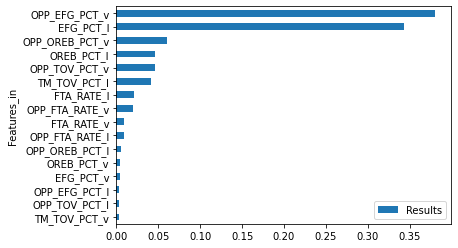

In [21]:
pd.DataFrame(zip(mod_gbr.feature_names_in_, mod_gbr.feature_importances_), columns=['Features_in','Results']). \
sort_values(by='Results').plot.barh('Features_in')
plt.legend(loc=4)

In [22]:
# df_01.drop('Predict3_PTS_l',axis=1,inplace=True)

In [23]:
df_01.insert(3,"Predict3_PTS_l", mod_gbr.predict(X_test))
df_01.head()

TEAM_NAME_l        TEAM_NAME_v  PTS_l  Predict3_PTS_l  \
548        Charlotte Hornets       Phoenix Suns     99       98.645698   
704         Dallas Mavericks  Memphis Grizzlies    104      109.621954   
244   Minnesota Timberwolves  Memphis Grizzlies    138      137.156761   
552       Washington Wizards  Charlotte Hornets    124      114.633448   
1164   Golden State Warriors          Utah Jazz    111      117.150088   

      Predict2_PTS_l  Predict_PTS_l  PTS_v  
548        96.579045      96.579045    133  
704       109.009045     109.009045     91  
244       142.260458     142.260458     95  
552       112.731338     112.731338    121  
1164      114.601107     114.601107    107

## Regresión Lineal por REGULARIZACIÓN:
#### - Lasso: La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión  (||β||1=∑pj=1|βj|) . A esta penalización se le conoce como l1 y tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero.
#### - Ridge: La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado  (||β||22=∑pj=1β2j) . A esta penalización se le conoce como l2 y tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero.
#### - Elastic Net: Elastic net incluye una regularización que combina la penalización l1 y l2  (αλ||β||1+12(1−α)||β||22) . El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro  α . Su valor está comprendido en el intervalo [0,1]. Cuando  α=0 , se aplica ridge y cuando  α=1  se aplica lasso. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización l1 ( α  muy próximo a 1) para conseguir seleccionar predictores y un poco a la l2 para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados.  
#### - Lambda Search: Encontrar el mejor modelo implica identificar el valor óptimo del hiperparámetro de regularización lambda ( λ ). Al tratarse de un hiperparámetro, no hay forma de saber de antemano qué valor es el adecuado. Una forma de lograrlo es emplear validación cruzada o generalized cross validation, esta última es una adaptación eficiente de leave-one-out cross validation disponible para la regulación Ridge. Con scikit learn esto puede conseguirse fácilmente de dos formas:  Combinar GridSearchCV y un modelo de tipo Ridge, Lasso o ElasticNet. Emplear RidgeCV, LassoCV o ElasticNetCV. Son adaptaciones que incorporan validación cruzada. Si no se indica nada en el argumento cv, en RidgeCV, se aplica Generalized Cross-Validation (GCV). Si se le indica un valor entero, se aplica validación cruzada con GridSearchCV. Por ejemplo cv=10 equivale a 10-fold cross-validation, en lugar de Generalized Cross-Validation.
https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

In [24]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [25]:
# RIDGE
mod_ridge = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         ).fit(X = X_train, y = y_train)

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


In [26]:
print(mean_squared_error(y_test, mod_ridge.predict(X_test), squared=False))
print("Accuracy TEST (Precisión):", mod_ridge.score(X_test, y_test))
print("Accuracy2 TEST (Precisión):", r2_score(y_test, mod_ridge.predict(X_test)))
print("Accuracy TRAIN (Precisión):", mod_ridge.score(X_train, y_train))

5.819918907922495
Accuracy TEST (Precisión): 0.8049026041128067
Accuracy2 TEST (Precisión): 0.8049026041128067
Accuracy TRAIN (Precisión): 0.7911200773769795


In [27]:
df_01.insert(3,"Predict4_PTS_l", mod_ridge.predict(X_test))
df_01.head()

TEAM_NAME_l        TEAM_NAME_v  PTS_l  Predict4_PTS_l  \
548        Charlotte Hornets       Phoenix Suns     99       96.054995   
704         Dallas Mavericks  Memphis Grizzlies    104      109.074779   
244   Minnesota Timberwolves  Memphis Grizzlies    138      139.951960   
552       Washington Wizards  Charlotte Hornets    124      113.430431   
1164   Golden State Warriors          Utah Jazz    111      114.470392   

      Predict3_PTS_l  Predict2_PTS_l  Predict_PTS_l  PTS_v  
548        98.645698       96.579045      96.579045    133  
704       109.621954      109.009045     109.009045     91  
244       137.156761      142.260458     142.260458     95  
552       114.633448      112.731338     112.731338    121  
1164      117.150088      114.601107     114.601107    107

In [28]:
# LASSO.
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
mod_lasso = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         ).fit(X = X_train, y = y_train)

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [29]:
print(mean_squared_error(y_test, mod_lasso.predict(X_test), squared=False))
print(mod_lasso.alpha_)
# Coeficientes de determinación..
print("Accuracy TEST (Precisión):", mod_lasso.score(X_test, y_test))
print("Accuracy2 TEST (Precisión):", r2_score(y_test, mod_lasso.predict(X_test)))
print("Accuracy TRAIN (Precisión):", mod_lasso.score(X_train, y_train))

5.81713806251047
0.0007232633896483548
Accuracy TEST (Precisión): 0.8050890005526695
Accuracy2 TEST (Precisión): 0.8050890005526695
Accuracy TRAIN (Precisión): 0.7911358887575903


In [30]:
df_01.insert(3,"Predict5_PTS_l", mod_lasso.predict(X_test))
df_01.head()

TEAM_NAME_l        TEAM_NAME_v  PTS_l  Predict5_PTS_l  \
548        Charlotte Hornets       Phoenix Suns     99       96.065972   
704         Dallas Mavericks  Memphis Grizzlies    104      109.131340   
244   Minnesota Timberwolves  Memphis Grizzlies    138      140.053342   
552       Washington Wizards  Charlotte Hornets    124      113.455913   
1164   Golden State Warriors          Utah Jazz    111      114.549693   

      Predict4_PTS_l  Predict3_PTS_l  Predict2_PTS_l  Predict_PTS_l  PTS_v  
548        96.054995       98.645698       96.579045      96.579045    133  
704       109.074779      109.621954      109.009045     109.009045     91  
244       139.951960      137.156761      142.260458     142.260458     95  
552       113.430431      114.633448      112.731338     112.731338    121  
1164      114.470392      117.150088      114.601107     114.601107    107

In [31]:
# Creando el modelo con el mejor parámetro de alpha (a pelo..)
mod_lasso_opti = Lasso(alpha=0.0007232633896483548, normalize=True).fit(X = X_train, y = y_train)
print(mean_squared_error(y_test, mod_lasso_opti.predict(X_test), squared=False))

5.81713806251047


C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [32]:
# Observar que predictores son utilizados por el modelo Lasso, ya que los que tienen coeficiente igual a "0", son descartados
pd.DataFrame(zip(mod_lasso_opti.coef_, X_train.columns), columns=['coef','Predictores'])

coef     Predictores
0   148.268121       EFG_PCT_l
1    20.404084      FTA_RATE_l
2   -93.238570    TM_TOV_PCT_l
3    28.576421      OREB_PCT_l
4     2.975487   OPP_EFG_PCT_l
5    11.812090  OPP_FTA_RATE_l
6     4.516068   OPP_TOV_PCT_l
7    -9.957175  OPP_OREB_PCT_l
8     0.000000       EFG_PCT_v
9     0.000000      FTA_RATE_v
10    2.849679    TM_TOV_PCT_v
11   -0.000000      OREB_PCT_v
12    3.411416   OPP_EFG_PCT_v
13    1.680277  OPP_FTA_RATE_v
14   -4.243199   OPP_TOV_PCT_v
15   26.952397  OPP_OREB_PCT_v

In [33]:
pd.DataFrame(zip(mod_lasso_opti.coef_, X_train.columns), columns=['coef','Predictores'])[_.coef != 0]

coef     Predictores
0   148.268121       EFG_PCT_l
1    20.404084      FTA_RATE_l
2   -93.238570    TM_TOV_PCT_l
3    28.576421      OREB_PCT_l
4     2.975487   OPP_EFG_PCT_l
5    11.812090  OPP_FTA_RATE_l
6     4.516068   OPP_TOV_PCT_l
7    -9.957175  OPP_OREB_PCT_l
10    2.849679    TM_TOV_PCT_v
12    3.411416   OPP_EFG_PCT_v
13    1.680277  OPP_FTA_RATE_v
14   -4.243199   OPP_TOV_PCT_v
15   26.952397  OPP_OREB_PCT_v

In [34]:
# ELASTIC NET
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
mod_enet = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            normalize       = True,
            cv              = 10
         ).fit(X = X_train, y = y_train)

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66803.02989732286, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64576.97422627103, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14297.828240033094, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14187.376813705736, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: 

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13495.079226901327, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13495.076176238183, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: 

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64411.62300944607, tolerance: 13.062491073446328
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64268.465016127324, tolerance: 13.062491073446328
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: U

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16267.038436861563, tolerance: 13.062491073446328
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15942.022613606885, tolerance: 13.062491073446328
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: 

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13833.881799964833, tolerance: 13.062491073446328
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65862.3190356078, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65817.25299508715, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15379.73158979006, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15159.77645103978, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: User

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13757.050503750657, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13757.047958430641, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66108.00224153082, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66073.86307908985, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16786.3280142664, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16408.188319517114, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13930.940940866602, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13930.939073352516, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: 

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67359.47651395043, tolerance: 13.489489954853275
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67345.22487371168, tolerance: 13.489489954853275
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17587.843876582225, tolerance: 13.489489954853275
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17087.58384519206, tolerance: 13.489489954853275
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: U

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13751.614154665942, tolerance: 13.489489954853275
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13751.504323446896, tolerance: 13.489489954853275
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: 

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69537.78176640578, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18248.03944828966, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17736.918049677275, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: U

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14335.392575655373, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65830.08091651167, tolerance: 13.168756772009031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65827.85733793316, tolerance: 13.168756772009031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23556.828864150248, tolerance: 13.168756772009031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14099.167304605997, tolerance: 13.168756772009031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14098.748464532438, tolerance: 13.168756772009031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: 

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65664.68438713948, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63479.73802703476, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16084.318658647366, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14257.115120477394, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66103.05051882326, tolerance: 13.22068532731377
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWar

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65862.27095451698, tolerance: 13.22068532731377
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWar

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15426.177236250329, tolerance: 13.22068532731377
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15174.331053868143, tolerance: 13.22068532731377
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13563.102106993321, tolerance: 13.22068532731377
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66200.1487271223, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWar

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63622.27612160567, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63228.19193231448, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: Us

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14644.794796266862, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceW

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13747.73205956305, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWa

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.120114446322987, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.37194067755263, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.562033237405558, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desce

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.888185233314289, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.909210727775644, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.933609846586478, tolerance: 13.22835254237288
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.768899945851444, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.774484503905114, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.770808501492866, tolerance: 13.263872768361582
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.916508259360853, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.920931944157928, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.922790244771022, tolerance: 13.909196952595938
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.208566077828436, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.453161250705307, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.372873637454177, tolerance: 13.133271783295712
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.252369546495174, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.251252076599485, tolerance: 13.240655079006771
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.967631074228848, tolerance: 13.360628700564972
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

In [35]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {mod_enet.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod_enet.l1_ratio_}")
# El error del modelo.
print("RMSE:",mean_squared_error(y_test, mod_enet.predict(X_test), squared=False))
print("Accuracy TEST (Precisión):", mod_enet.score(X_test, y_test))
print("Accuracy2 TEST (Precisión):", r2_score(y_test, mod_enet.predict(X_test)))
print("Accuracy TRAIN (Precisión):", mod_enet.score(X_train, y_train))

Mejor valor de alpha encontrado: 0.0006222570836730231
Mejor valor de l1_ratio encontrado: 0.99
RMSE: 5.820901260109737
Accuracy TEST (Precisión): 0.8048367370341034
Accuracy2 TEST (Precisión): 0.8048367370341034
Accuracy TRAIN (Precisión): 0.7911135749912626


<AxesSubplot:ylabel='Modelo'>

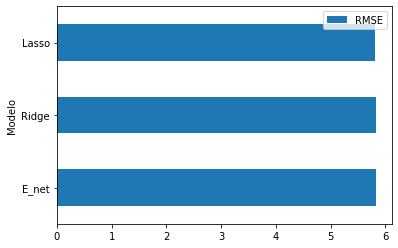

In [36]:
pd.DataFrame({'Modelo':['E_net','Lasso','Ridge'], 'RMSE': [mean_squared_error(y_test, mod_enet.predict(X_test), squared=False), \
             mean_squared_error(y_test, mod_lasso_opti.predict(X_test), squared=False), \
             mean_squared_error(y_test, mod_ridge.predict(X_test), squared=False)]} \
             ).sort_values(by='RMSE', ascending=False).plot.barh('Modelo') # Ordenado de menor a mayor..

#### ***EL modelo que mejor error tiene (MENOR ERROR - RMSE), es por poco el modelo LASSO.**

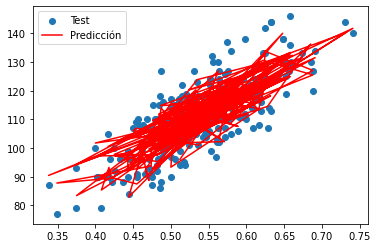

In [37]:
plt.scatter(X_test.EFG_PCT_l,y_test, label="Test")
plt.plot(X_test.EFG_PCT_l, mod_lasso_opti.predict(X_test), c='red', label="Predicción")
plt.legend(loc="best")
plt.show()

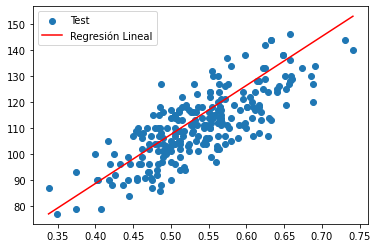

In [38]:
plt.scatter(X_test.EFG_PCT_l,y_test, label="Test")
plt.plot([X_test.EFG_PCT_l.min(), X_test.EFG_PCT_l.max()], [y_train.min(), y_train.max()], c='red', label="Regresión Lineal")
plt.legend(loc="best")
plt.show()

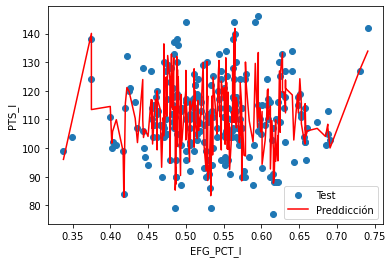

In [39]:
plt.scatter(X_test.EFG_PCT_l.sort_values(),y_test, label="Test")
plt.plot(X_test.EFG_PCT_l.sort_values(), mod_lasso_opti.predict(X_test), c='red', label="Preddicción")
plt.legend(loc="best")
plt.xlabel("EFG_PCT_l")
plt.ylabel("PTS_l")
plt.show()

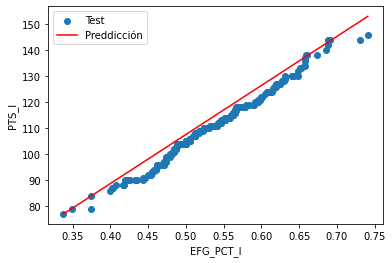

In [40]:
plt.scatter(X_test.EFG_PCT_l.sort_values(),y_test.sort_values(), label="Test")
plt.plot([X_test.EFG_PCT_l.min(), X_test.EFG_PCT_l.max()], [y_train.min(), y_train.max()], c='red', label="Preddicción")
plt.legend(loc="best")
plt.xlabel("EFG_PCT_l")
plt.ylabel("PTS_l")
plt.show()
# ESTA GRAFICA EN PRINCIPIO NO TIENE NINGÚN SENTIDO..AL ORDENAR LOS VALORES DEL EJE X PARA QUE LAS PREDICCIONES SIGAN UN
# ORDEN, SE PIERDE LA VISUALIZACION DE LA CORRELACIÓN POSITIVA FUERTE DE LA VAR.PREDICTORA CON LA VAR.OBJETIVO..

In [41]:
### CORRELACION VAR.PREDICTORAS...
X_train.corr()

EFG_PCT_l  FTA_RATE_l  TM_TOV_PCT_l  OREB_PCT_l  \
EFG_PCT_l        1.000000   -0.001015      0.051024   -0.022884   
FTA_RATE_l      -0.001015    1.000000      0.027513   -0.078681   
TM_TOV_PCT_l     0.051024    0.027513      1.000000    0.102345   
OREB_PCT_l      -0.022884   -0.078681      0.102345    1.000000   
OPP_EFG_PCT_l   -0.005149    0.102764     -0.087684    0.018337   
OPP_FTA_RATE_l   0.014436    0.116134     -0.056457   -0.042994   
OPP_TOV_PCT_l   -0.146747   -0.073290      0.048443   -0.004772   
OPP_OREB_PCT_l  -0.022479    0.044021     -0.013281    0.009866   
EFG_PCT_v       -0.005149    0.102764     -0.087684    0.018337   
FTA_RATE_v       0.014436    0.116134     -0.056457   -0.042994   
TM_TOV_PCT_v    -0.146747   -0.073290      0.048443   -0.004772   
OREB_PCT_v       0.023405    0.064700      0.006038   -0.029810   
OPP_EFG_PCT_v    1.000000   -0.001015      0.051024   -0.022884   
OPP_FTA_RATE_v  -0.001015    1.000000      0.027513   -0.078681   
OPP_TOV_PCT_v    0.051024    0.027513      1.000000    0.102345   
OPP_OREB_PCT_v  -0.049338   -0.042676      0.133451    0.862847   

                OPP_EFG_PCT_l  OPP_FTA_RATE_l  OPP_TOV_PCT_l  OPP_OREB_PCT_l  \
EFG_PCT_l           -0.005149        0.014436      -0.146747       -0.022479   
FTA_RATE_l           0.102764        0.116134      -0.073290        0.044021   
TM_TOV_PCT_l        -0.087684       -0.056457       0.048443       -0.013281   
OREB_PCT_l           0.018337       -0.042994      -0.004772        0.009866   
OPP_EFG_PCT_l        1.000000       -0.023662       0.024315       -0.084032   
OPP_FTA_RATE_l      -0.023662        1.000000       0.040907       -0.009550   
OPP_TOV_PCT_l        0.024315        0.040907       1.000000        0.141269   
OPP_OREB_PCT_l      -0.084032       -0.009550       0.141269        1.000000   
EFG_PCT_v            1.000000       -0.023662       0.024315       -0.084032   
FTA_RATE_v          -0.023662        1.000000       0.040907       -0.009550   
TM_TOV_PCT_v         0.024315        0.040907       1.000000        0.141269   
OREB_PCT_v          -0.065409       -0.007487       0.080158        0.860077   
OPP_EFG_PCT_v       -0.005149        0.014436      -0.146747       -0.022479   
OPP_FTA_RATE_v       0.102764        0.116134      -0.073290        0.044021   
OPP_TOV_PCT_v       -0.087684       -0.056457       0.048443       -0.013281   
OPP_OREB_PCT_v       0.053043        0.019971      -0.016766       -0.003433   

                EFG_PCT_v  FTA_RATE_v  TM_TOV_PCT_v  OREB_PCT_v  \
EFG_PCT_l       -0.005149    0.014436     -0.146747    0.023405   
FTA_RATE_l       0.102764    0.116134     -0.073290    0.064700   
TM_TOV_PCT_l    -0.087684   -0.056457      0.048443    0.006038   
OREB_PCT_l       0.018337   -0.042994     -0.004772   -0.029810   
OPP_EFG_PCT_l    1.000000   -0.023662      0.024315   -0.065409   
OPP_FTA_RATE_l  -0.023662    1.000000      0.040907   -0.007487   
OPP_TOV_PCT_l    0.024315    0.040907      1.000000    0.080158   
OPP_OREB_PCT_l  -0.084032   -0.009550      0.141269    0.860077   
EFG_PCT_v        1.000000   -0.023662      0.024315   -0.065409   
FTA_RATE_v      -0.023662    1.000000      0.040907   -0.007487   
TM_TOV_PCT_v     0.024315    0.040907      1.000000    0.080158   
OREB_PCT_v      -0.065409   -0.007487      0.080158    1.000000   
OPP_EFG_PCT_v   -0.005149    0.014436     -0.146747    0.023405   
OPP_FTA_RATE_v   0.102764    0.116134     -0.073290    0.064700   
OPP_TOV_PCT_v   -0.087684   -0.056457      0.048443    0.006038   
OPP_OREB_PCT_v   0.053043    0.019971     -0.016766   -0.030431   

                OPP_EFG_PCT_v  OPP_FTA_RATE_v  OPP_TOV_PCT_v  OPP_OREB_PCT_v  
EFG_PCT_l            1.000000       -0.001015       0.051024       -0.049338  
FTA_RATE_l          -0.001015        1.000000       0.027513       -0.042676  
TM_TOV_PCT_l         0.051024        0.027513       1.000000        0.133451  
OREB_PCT_l          -0.022884       -0.078681       0.10234

In [42]:
# CORRELACIONES DE VAR.PREDICTORAS CON VAR.OBJETIVO
df_00.loc[:,["PTS_l","EFG_PCT_l"]].corr()

PTS_l  EFG_PCT_l
PTS_l      1.000000   0.780033
EFG_PCT_l  0.780033   1.000000

In [43]:
# CORRELACIONES DE VAR.PREDICTORAS CON VAR.OBJETIVO
df_00.corr().loc[X_train.columns, "PTS_l"]

EFG_PCT_l         0.780033
FTA_RATE_l        0.150682
TM_TOV_PCT_l     -0.189435
OREB_PCT_l        0.234783
OPP_EFG_PCT_l     0.075899
OPP_FTA_RATE_l    0.104599
OPP_TOV_PCT_l    -0.130185
OPP_OREB_PCT_l   -0.064295
EFG_PCT_v         0.075899
FTA_RATE_v        0.104599
TM_TOV_PCT_v     -0.130185
OREB_PCT_v       -0.029163
OPP_EFG_PCT_v     0.780033
OPP_FTA_RATE_v    0.150682
OPP_TOV_PCT_v    -0.189435
OPP_OREB_PCT_v    0.213906
Name: PTS_l, dtype: float64

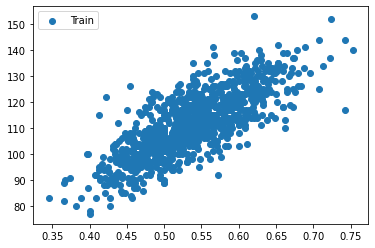

In [44]:
plt.scatter(X_train.EFG_PCT_l,y_train, label="Train")
#plt.plot(X_test.EFG_PCT_l, mod_lasso_opti.predict(X_test), c='red', label="Predicción")
plt.legend(loc="best")
plt.show()

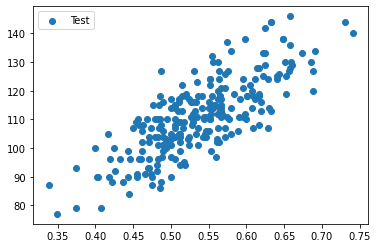

In [45]:
plt.scatter(X_test.EFG_PCT_l,y_test, label="Test")
#plt.plot(X_test.EFG_PCT_l, mod_lasso_opti.predict(X_test), c='red', label="Predicción")
plt.legend(loc="best")
plt.show()

In [46]:
# Claramente se ve que la mejor var. predictora que esta correlacionada con la var.objetivo tiene una correlación positiva
# muy fuerte, es decir, cuanto mayor es el % de EFG_PCT_l del equipo local, mayor son los puntos totales anoitados..

### KNN REGRESSOR.

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [48]:
mod_knnregressor = KNeighborsRegressor()
params = {"n_neighbors": range(1,20)} # rango del 1..20 vecinos
mod_knnregressor_gs = GridSearchCV(mod_knnregressor, params, cv=3).fit(X_train, y_train)

print("Accuracy TRAIN (Precisión):", mod_knnregressor_gs.score(X_train, y_train))
print("Accuracy TEST (Precisión):", mod_knnregressor_gs.score(X_test, y_test))
print("Accuracy TRAIN (Precisión):", mod_knnregressor_gs.best_estimator_.score(X_train, y_train))
print("Accuracy TEST (Precisión):", mod_knnregressor_gs.best_estimator_.score(X_test, y_test))
print("RMSE:",mean_squared_error(y_test, mod_knnregressor_gs.predict(X_test), squared=False))

Accuracy TRAIN (Precisión): 0.714976471828157
Accuracy TEST (Precisión): 0.636771125642827
Accuracy TRAIN (Precisión): 0.714976471828157
Accuracy TEST (Precisión): 0.636771125642827
RMSE: 7.941113065803707


In [49]:
print("Mejor Estimador (Número de vecinos):", mod_knnregressor_gs.best_estimator_)

Mejor Estimador (Número de vecinos): KNeighborsRegressor(n_neighbors=9)


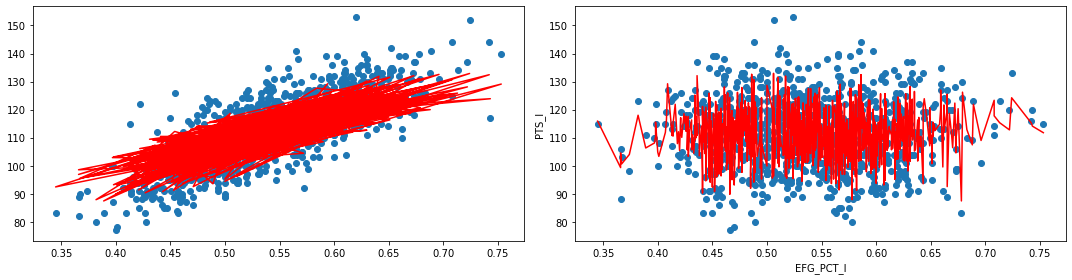

In [50]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X_train.EFG_PCT_l,y_train)
axs[0].plot(X_train.EFG_PCT_l, mod_knnregressor_gs.best_estimator_.predict(X_train), c='red')
# axs[0].xlabel("EFG_PCT_l")
# axs[0].ylabel("PTS_l")
axs[1].scatter(X_train.EFG_PCT_l.sort_values(),y_train)
axs[1].plot(X_train.EFG_PCT_l.sort_values(), mod_knnregressor_gs.best_estimator_.predict(X_train), c='red')
plt.xlabel("EFG_PCT_l")
plt.ylabel("PTS_l")
plt.tight_layout()
plt.show()
# Averiguar como poner un X,y label a cada gráfica..

### ÁRBOLES DE DECISIÓN (Decission tree) - Para Regresión.

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
mod_dtree = DecisionTreeRegressor()
params = {"max_depth": range(3,7)}
mod_dtree_gs = GridSearchCV(mod_dtree, params, cv=3).fit(X_train, y_train)

print("Accuracy TRAIN (Precisión):", mod_dtree_gs.score(X_train, y_train))
print("Accuracy TEST (Precisión):", mod_dtree_gs.score(X_test, y_test))

Accuracy TRAIN (Precisión): 0.6908010413290975
Accuracy TEST (Precisión): 0.6330309486576156


In [53]:
print("Mejor Estimador (Número de vecinos):", mod_dtree_gs.best_estimator_)

Mejor Estimador (Número de vecinos): DecisionTreeRegressor(max_depth=4)


In [54]:
print("Accuracy2 TRAIN (Precisión):", r2_score(y_train, mod_dtree_gs.predict(X_train)))
print("Accuracy2 TEST (Precisión):", r2_score(y_test, mod_dtree_gs.predict(X_test)))
print("Accuracy2 TRAIN (Precisión):", r2_score(y_train, mod_dtree_gs.best_estimator_.predict(X_train)))
print("Accuracy2 TEST (Precisión):", r2_score(y_test, mod_dtree_gs.best_estimator_.predict(X_test)))
print("RMSE TRAIN:",mean_squared_error(y_train, mod_dtree_gs.predict(X_train), squared=False))
print("RMSE TEST:",mean_squared_error(y_test, mod_dtree_gs.predict(X_test), squared=False))

Accuracy2 TRAIN (Precisión): 0.6908010413290975
Accuracy2 TEST (Precisión): 0.6330309486576156
Accuracy2 TRAIN (Precisión): 0.6908010413290975
Accuracy2 TEST (Precisión): 0.6330309486576156
RMSE TRAIN: 6.816810658783926
RMSE TEST: 7.981893277850503


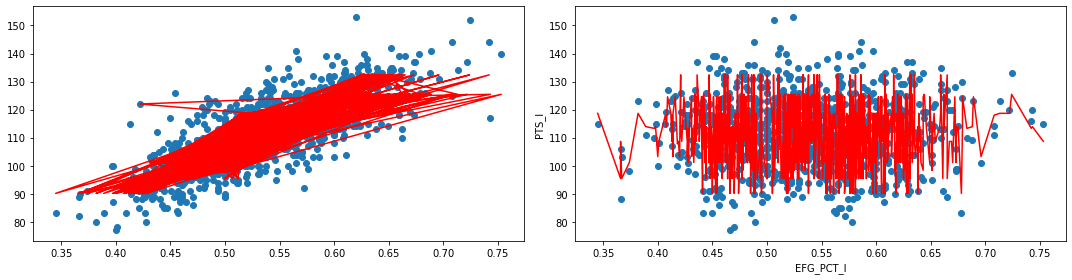

In [55]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
axs[0].scatter(X_train.EFG_PCT_l,y_train)
axs[0].plot(X_train.EFG_PCT_l, mod_dtree_gs.best_estimator_.predict(X_train), c='red')
# axs[0].xlabel("EFG_PCT_l")
# axs[0].ylabel("PTS_l")
axs[1].scatter(X_train.EFG_PCT_l.sort_values(),y_train)
axs[1].plot(X_train.EFG_PCT_l.sort_values(), mod_dtree_gs.best_estimator_.predict(X_train), c='red')
plt.xlabel("EFG_PCT_l")
plt.ylabel("PTS_l")
plt.tight_layout()
plt.show()


### BOSQUES ALEATORIOS - Random Forest  
https://medium.datadriveninvestor.com/random-forest-regression-9871bc9a25eb

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold


In [57]:
mod_rforestr = RandomForestRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_mod_rforestr = cross_val_score(mod_rforestr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)

In [58]:
print("Error Absoluto Medio (MAE):",scores_mod_rforestr.mean())
print("Desviación Estandard del MAE:",scores_mod_rforestr.std())

Error Absoluto Medio (MAE): -6.39765923658113
Desviación Estandard del MAE: 0.5161204583186538


In [59]:
mod_rforestr.fit(X_train, y_train)
print("Accuracy TRAIN (Precisión):", mod_rforestr.score(X_train, y_train))
print("Accuracy TEST (Precisión):", mod_rforestr.score(X_test, y_test))

Accuracy TRAIN (Precisión): 0.9617521632159441
Accuracy TEST (Precisión): 0.7433473859853377


In [60]:
print("Accuracy2 TRAIN (Precisión):", r2_score(y_train, mod_rforestr.predict(X_train)))
print("Accuracy2 TEST (Precisión):", r2_score(y_test, mod_rforestr.predict(X_test)))
print("RMSE TRAIN:",mean_squared_error(y_train, mod_rforestr.predict(X_train), squared=False))
print("RMSE TEST:",mean_squared_error(y_test, mod_rforestr.predict(X_test), squared=False))

Accuracy2 TRAIN (Precisión): 0.9617521632159441
Accuracy2 TEST (Precisión): 0.7433473859853377
RMSE TRAIN: 2.3975388803785496
RMSE TEST: 6.675196321828995


#### * Por los resultados de evaluación del modelo tiene un porcentaje muy alto de que el modelo está sobreajustado (overfitting)(Buscar maneras de eliminar el sobreajuste, una es quitando los valores atipicos (outlayers) de los predictores..), ya que la precisión (Accuracy) para train a dado muy alta en comparación con la de test..

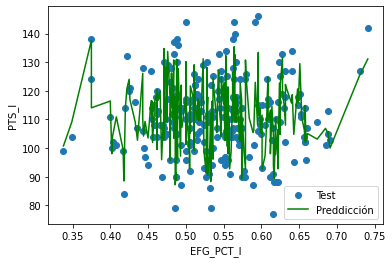

In [61]:
plt.scatter(X_test.EFG_PCT_l.sort_values(),y_test, label="Test")
plt.plot(X_test.EFG_PCT_l.sort_values(), mod_rforestr.predict(X_test), c='green', label="Preddicción")
plt.legend(loc="best")
plt.xlabel("EFG_PCT_l")
plt.ylabel("PTS_l")
plt.show()

In [62]:
# Predicción de una muestra del propio conjunto de datos, xo adulterada con un +10% todas las vr.predictoras y comparar con
# original.
print(X_test.iloc[1],"\n", y_test.iloc[1])
X_test.head()
#mod_rforestr.predict([[0.55]])

EFG_PCT_l         0.547
FTA_RATE_l        0.419
TM_TOV_PCT_l      0.186
OREB_PCT_l        0.214
OPP_EFG_PCT_l     0.394
OPP_FTA_RATE_l    0.192
OPP_TOV_PCT_l     0.148
OPP_OREB_PCT_l    0.415
EFG_PCT_v         0.394
FTA_RATE_v        0.192
TM_TOV_PCT_v      0.148
OREB_PCT_v        0.323
OPP_EFG_PCT_v     0.547
OPP_FTA_RATE_v    0.419
OPP_TOV_PCT_v     0.186
OPP_OREB_PCT_v    0.262
Name: 704, dtype: float64 
 104


EFG_PCT_l  FTA_RATE_l  TM_TOV_PCT_l  OREB_PCT_l  OPP_EFG_PCT_l  \
548       0.512       0.247         0.168       0.100          0.587   
704       0.547       0.419         0.186       0.214          0.394   
244       0.648       0.308         0.132       0.383          0.404   
552       0.552       0.356         0.142       0.213          0.548   
1164      0.595       0.143         0.117       0.133          0.511   

      OPP_FTA_RATE_l  OPP_TOV_PCT_l  OPP_OREB_PCT_l  EFG_PCT_v  FTA_RATE_v  \
548            0.117          0.153           0.412      0.587       0.117   
704            0.192          0.148           0.415      0.394       0.192   
244            0.422          0.153           0.339      0.404       0.422   
552            0.125          0.085           0.246      0.548       0.125   
1164           0.247          0.130           0.352      0.511       0.247   

      TM_TOV_PCT_v  OREB_PCT_v  OPP_EFG_PCT_v  OPP_FTA_RATE_v  OPP_TOV_PCT_v  \
548          0.153       0.275          0.512           0.247          0.168   
704          0.148       0.323          0.547           0.419          0.186   
244          0.153       0.179          0.648           0.308          0.132   
552          0.085       0.228          0.552           0.356          0.142   
1164         0.130       0.222          0.595           0.143          0.117   

      OPP_OREB_PCT_v  
548            0.180  
704            0.262  
244            0.426  
552            0.255  
1164           0.200

In [63]:
np.array(X_test.iloc[1]).reshape(1,-1)
# valores de las var.predictoras de la muestra en el indice "1"de X_test, q es la muestra con indice "704" en el DF principal

array([[0.547, 0.419, 0.186, 0.214, 0.394, 0.192, 0.148, 0.415, 0.394,
        0.192, 0.148, 0.323, 0.547, 0.419, 0.186, 0.262]])

In [64]:
mod_rforestr.predict(np.array(X_test.iloc[1]).reshape(1,-1))
# Al solo predecir una muestra, hay q transformarla de tipo serie en tipo array, que produce un warning por no
# tener los nombres de las columnas..

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([109.08])

In [65]:
mod_rforestr.predict([X_test.iloc[1]]) # tb se puede tranformar la serie encerrandola entre corchetes

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([109.08])

In [66]:
mod_rforestr.predict(X_test.iloc[1:3,:])

array([109.08, 137.59])

In [67]:
y_test.iloc[1:3,]

704    104
244    138
Name: PTS_l, dtype: int64

### BOOSTING - XGBoost y AdaBoost.
https://machinelearningmastery.com/adaboost-ensemble-in-python/
- En los algoritmos de boosting, los modelos simples son utilizados secuencialmente, es decir, cada modelo
simple va delante o detrás de otro modelo simple. El principal objetivo de los métodos secuenciales es el de
aprovecharse de la dependencia entre los modelos simples. El rendimiento general puede ser mejorado
haciendo que un modelo simple posterior les dé más importancia a los errores cometidos por un modelo
simple previo. Poniendo un ejemplo, es como si al intentar resolver un problema se aprovechase el
conocimiento de los errores de otros.  
Las predicciones de cada modelo simple se combinan por medio de una votación (para problemas de
clasificación) o por medio de una suma ponderada (para problemas de regresión) para producir la predicción
final. La diferencia con el bagging es que en el boosting los algoritmos no se entrenan independientemente,
sino que se ponderan según los errores de los anteriores. Se trata de un método que reduce el sesgo.


In [68]:
# import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

In [69]:
mod_adaboostr = AdaBoostRegressor()
# params = {"eta": [0.3, 0.5], "lambda":[0.5, 1.0], "max_depth": [3, 7]}
params = {"n_estimators":[10, 50, 100, 500], "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
mod_adaboostr_gs = GridSearchCV(estimator=mod_adaboostr, param_grid=params, n_jobs=1, cv=cv, scoring="accuracy"). \
fit(X_train, y_train)

print("Best: %f using %s" % (mod_adaboostr_gs.best_score_, mod_adaboostr_gs.best_params_))

# OJO TARDA 10 MINUTOS...

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  Fil

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

Best: nan using {'learning_rate': 0.0001, 'n_estimators': 10}


C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 219, in __call__
    return self._score(
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\RubenGA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_target

In [70]:
mod_adaboostr_gs.cv_results_

{'mean_fit_time': array([0.05552432, 0.20044452, 0.39363154, 2.0091383 , 0.0363029 ,
        0.19538856, 0.37570469, 1.91525702, 0.03707879, 0.19355609,
        0.35582364, 1.88725015, 0.03746611, 0.20079712, 0.37328325,
        1.61763906, 0.04014194, 0.17228154, 0.30066652, 1.32282132]),
 'std_fit_time': array([0.01043889, 0.02707078, 0.04254351, 0.31750926, 0.00828535,
        0.02716659, 0.03815988, 0.23758327, 0.00863252, 0.02604989,
        0.0150486 , 0.19471207, 0.00885522, 0.02420364, 0.04644623,
        0.16944611, 0.00846271, 0.02161344, 0.04178277, 0.15544068]),
 'mean_score_time': array([0.00276563, 0.00785506, 0.01066468, 0.04219708, 0.00359224,
        0.0060591 , 0.00911268, 0.04168642, 0.00379288, 0.00453941,
        0.00993082, 0.0398727 , 0.00328406, 0.00678458, 0.01130161,
        0.03519162, 0.00250219, 0.00384957, 0.00975694, 0.03965466]),
 'std_score_time': array([0.00290828, 0.00586019, 0.00743081, 0.01336352, 0.00611077,
        0.00666597, 0.00713654, 0.011072

In [111]:
# print(mean_squared_error(y_test, mod_adaboostr_gs.predict(X_test), squared=False))
# print(mod_adaboostr_gs.score(X_test, y_test))
# # print(mod_adaboostr_gs.score(X_test, np.argmax(y_test, axis=-1)))
# print(r2_score(y_test, mod_adaboostr_gs.predict(X_test)))

In [ ]:
np.logspace(-10, 2, 200) # Crea un array con 200 posiciones numericas entre el -10 y el 2..